In [357]:
# Import statements
import sys
# !{sys.executable} -m pip install dataframe-image
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import dataframe_image as dfi

# Make all numbers display raw instead of scientific
pd.set_option("display.float_format", "{:.2f}".format)

In [358]:
# Initial loading of data from CSV file
df = pd.read_csv("data/imdb_top_1000.csv")

In [359]:
# Let's look at how many columns, NaN, and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [360]:
# Look at DataFrame in the table format
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.30,Two imprisoned men bond over a number of years...,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.60,A young New York socialite becomes interested ...,76.00,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.60,Sprawling epic covering the life of a Texas ca...,84.00,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.60,"In Hawaii in 1941, a private is cruelly punish...",85.00,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.60,Several survivors of a torpedoed merchant ship...,78.00,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [361]:
# Remove columns that won't be used in our analysis
cleaned_df = df.drop("Poster_Link", axis=1)
cleaned_df = cleaned_df.drop("Certificate", axis=1)
cleaned_df = cleaned_df.drop("Overview", axis=1)
cleaned_df = cleaned_df.dropna()
cleaned_df

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,175 min,"Crime, Drama",9.20,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.00,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.00,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,96 min,"Crime, Drama",9.00,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,157 min,"Drama, War, Western",7.60,77.00,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,"696,690"
991,Kelly's Heroes,1970,144 min,"Adventure, Comedy, War",7.60,50.00,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,"1,378,435"
992,The Jungle Book,1967,78 min,"Animation, Adventure, Family",7.60,65.00,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,"141,843,612"
994,A Hard Day's Night,1964,87 min,"Comedy, Music, Musical",7.60,96.00,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024"


In [362]:
# Release Year, Runtime, and Gross have to be converted to number formats

# Turn the single bad Released Year data into good one
bad_rows = cleaned_df[pd.to_numeric(cleaned_df["Released_Year"], errors="coerce").isna()]
print(bad_rows[["Released_Year"]])

cleaned_df.loc[966, "Released_Year"] = 1995

    Released_Year
966            PG


In [363]:
# Force change Released Year to integer
cleaned_df["Released_Year"] = pd.to_numeric(cleaned_df["Released_Year"], errors="coerce").astype("int64")

# Remove "min" from Runtime
cleaned_df["Runtime"] = cleaned_df["Runtime"].str.replace("min", "")
# Force change to integer
cleaned_df["Runtime"] = pd.to_numeric(cleaned_df["Runtime"], errors="coerce").astype("int64")

# Let's turn the Gross column from string to int
# Have to remove the commas first
cleaned_df["Gross"] = cleaned_df["Gross"].str.replace(",", "")

# Force change to float -- astype doesn't work due to nulls
cleaned_df["Gross"] = pd.to_numeric(cleaned_df["Gross"], errors="coerce")

cleaned_df

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,175,"Crime, Drama",9.20,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.00,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,202,"Crime, Drama",9.00,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,96,"Crime, Drama",9.00,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,157,"Drama, War, Western",7.60,77.00,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,696690
991,Kelly's Heroes,1970,144,"Adventure, Comedy, War",7.60,50.00,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,1378435
992,The Jungle Book,1967,78,"Animation, Adventure, Family",7.60,65.00,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,141843612
994,A Hard Day's Night,1964,87,"Comedy, Music, Musical",7.60,96.00,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024


In [364]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 0 to 997
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   750 non-null    object 
 1   Released_Year  750 non-null    int64  
 2   Runtime        750 non-null    int64  
 3   Genre          750 non-null    object 
 4   IMDB_Rating    750 non-null    float64
 5   Meta_score     750 non-null    float64
 6   Director       750 non-null    object 
 7   Star1          750 non-null    object 
 8   Star2          750 non-null    object 
 9   Star3          750 non-null    object 
 10  Star4          750 non-null    object 
 11  No_of_Votes    750 non-null    int64  
 12  Gross          750 non-null    int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 98.2+ KB


In [365]:
cleaned_df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,750.00,750.00,750.00,750.00,750.00,750.00
mean,1995.07,123.30,7.93,77.46,342132.67,74952069.31
std,19.50,26.02,0.29,12.49,350979.48,113328042.80
min,1925.00,71.00,7.60,28.00,25198.00,1305.00
25%,1986.00,104.00,7.70,70.00,88547.25,5014811.50
50%,2001.00,120.00,7.90,78.00,219734.00,31900000.00
75%,2010.00,136.00,8.10,86.00,481218.50,98091570.75
max,2019.00,238.00,9.30,100.00,2343110.00,936662225.00


In [366]:
# Need to replace gross with gross adjusted column

# Make huge dictionary with years from 1920 to 2020 and Consumer Price Index of that year
cpi_dict = {
    1920: 20.0, 1921: 17.9, 1922: 16.8, 1923: 17.1, 1924: 17.1,
    1925: 17.5, 1926: 17.7, 1927: 17.4, 1928: 17.1, 1929: 17.1,
    1930: 16.7, 1931: 15.2, 1932: 13.7, 1933: 13.0, 1934: 13.4,
    1935: 13.7, 1936: 13.9, 1937: 14.4, 1938: 14.1, 1939: 13.9,
    1940: 14.0, 1941: 14.7, 1942: 16.3, 1943: 17.3, 1944: 17.6,
    1945: 18.0, 1946: 19.5, 1947: 22.3, 1948: 24.1, 1949: 23.8,
    1950: 24.1, 1951: 26.0, 1952: 26.5, 1953: 26.7, 1954: 26.9,
    1955: 26.8, 1956: 27.2, 1957: 28.1, 1958: 28.9, 1959: 29.1,
    1960: 29.6, 1961: 29.9, 1962: 30.2, 1963: 30.6, 1964: 31.0,
    1965: 31.5, 1966: 32.4, 1967: 33.4, 1968: 34.8, 1969: 36.7,
    1970: 38.8, 1971: 40.5, 1972: 41.8, 1973: 44.4, 1974: 49.3,
    1975: 53.8, 1976: 56.9, 1977: 60.6, 1978: 65.2, 1979: 72.6,
    1980: 82.4, 1981: 90.9, 1982: 96.5, 1983: 99.6, 1984: 103.9,
    1985: 107.6, 1986: 109.6, 1987: 113.6, 1988: 118.3, 1989: 124.0,
    1990: 130.7, 1991: 136.2, 1992: 140.3, 1993: 144.5, 1994: 148.2,
    1995: 152.4, 1996: 156.9, 1997: 160.5, 1998: 163.0, 1999: 166.6,
    2000: 172.2, 2001: 177.1, 2002: 179.9, 2003: 184.0, 2004: 188.9,
    2005: 195.3, 2006: 201.6, 2007: 207.3, 2008: 215.3, 2009: 214.5,
    2010: 218.1, 2011: 224.9, 2012: 229.6, 2013: 233.0, 2014: 236.7,
    2015: 237.0, 2016: 240.0, 2017: 245.1, 2018: 251.1, 2019: 255.7,
    2020: 258.8
}

# Apply our annual CPI averages to the Gross to get Gross Adjusted
current_year = 2020
cleaned_df["GrossAdjusted"] = cleaned_df.apply(
	lambda row: row["Gross"] *
		(
			cpi_dict[current_year] / cpi_dict.get(row["Released_Year"], cpi_dict[current_year])
		),
		axis=1
)

# We no longer need Gross
cleaned_df = cleaned_df.drop("Gross", axis=1)

cleaned_df

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,GrossAdjusted
0,The Shawshank Redemption,1994,142,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,49492389.86
1,The Godfather,1972,175,"Crime, Drama",9.20,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,835629358.06
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.00,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,642923201.61
3,The Godfather: Part II,1974,202,"Crime, Drama",9.00,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,300795943.20
4,12 Angry Men,1957,96,"Crime, Drama",9.00,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,40155444.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,157,"Drama, War, Western",7.60,77.00,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,4451935.11
991,Kelly's Heroes,1970,144,"Adventure, Comedy, War",7.60,50.00,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,9194303.56
992,The Jungle Book,1967,78,"Animation, Adventure, Family",7.60,65.00,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,1099075652.26
994,A Hard Day's Night,1964,87,"Comedy, Music, Musical",7.60,96.00,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,115040974.55


In [367]:
# Let's use the numeric dataframe
numeric_df = cleaned_df.select_dtypes(include="number")
numeric_df

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,GrossAdjusted
0,1994,142,9.30,80.00,2343110,49492389.86
1,1972,175,9.20,100.00,1620367,835629358.06
2,2008,152,9.00,84.00,2303232,642923201.61
3,1974,202,9.00,90.00,1129952,300795943.20
4,1957,96,9.00,96.00,689845,40155444.84
...,...,...,...,...,...,...
990,1971,157,7.60,77.00,30144,4451935.11
991,1970,144,7.60,50.00,45338,9194303.56
992,1967,78,7.60,65.00,166409,1099075652.26
994,1964,87,7.60,96.00,40351,115040974.55


# Correlation Visuals

## Correlation Heatmap

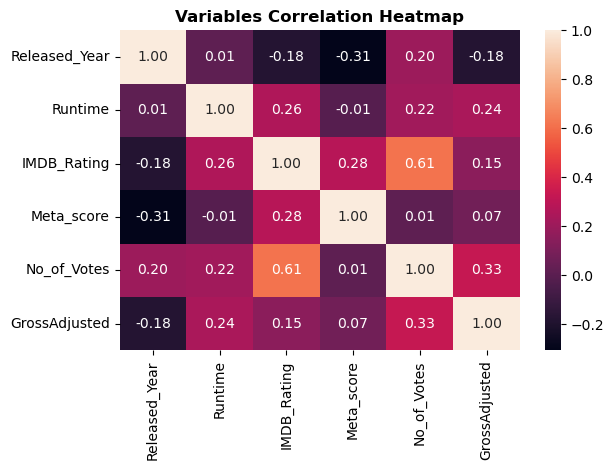

In [368]:
# Make a heatmap from numeric dataframe
corr_fig, corr_ax = plt.subplots()
corr = numeric_df.corr(numeric_only=True)
sns.heatmap(
	corr,
	annot=True,
	fmt=".2f"
)

corr_ax.set_title("Variables Correlation Heatmap", weight="bold")

plt.tight_layout()
plt.show()

corr_fig.savefig("img/correlation_heatmap.png", dpi=300, bbox_inches="tight")

## Correlation Graph

In [369]:
# Create unstacked correlation dataframe for visual aid
corr_unstacked = corr.unstack().reset_index()

# Name the columns
corr_unstacked.columns = ["Variable_1", "Variable_2", "Correlation"]

# Remove variables being compared to itself
corr_unstacked = corr_unstacked[corr_unstacked["Variable_1"] != corr_unstacked["Variable_2"]]

# Remove duplicated variable pairs
corr_unstacked = corr_unstacked.drop_duplicates(subset=["Correlation"])

# Order by highest correlation
corr_unstacked = corr_unstacked.sort_values(by="Correlation", ascending=False)

# Combine variables
corr_combined = corr_unstacked
corr_combined["Variables"] = corr_unstacked["Variable_1"] + " vs. " + corr_unstacked["Variable_2"]

# Reorder columns
corr_combined = corr_combined[["Variables", "Correlation"]]

corr_combined = corr_combined.reset_index(drop=True)
corr_combined

,Variables,Correlation
0,IMDB_Rating vs. No_of_Votes,0.61
1,No_of_Votes vs. GrossAdjusted,0.33
2,IMDB_Rating vs. Meta_score,0.28
3,Runtime vs. IMDB_Rating,0.26
4,Runtime vs. GrossAdjusted,0.24
5,Runtime vs. No_of_Votes,0.22
6,Released_Year vs. No_of_Votes,0.20
7,IMDB_Rating vs. GrossAdjusted,0.15
8,Meta_score vs. GrossAdjusted,0.07
9,Released_Year vs. Runtime,0.01


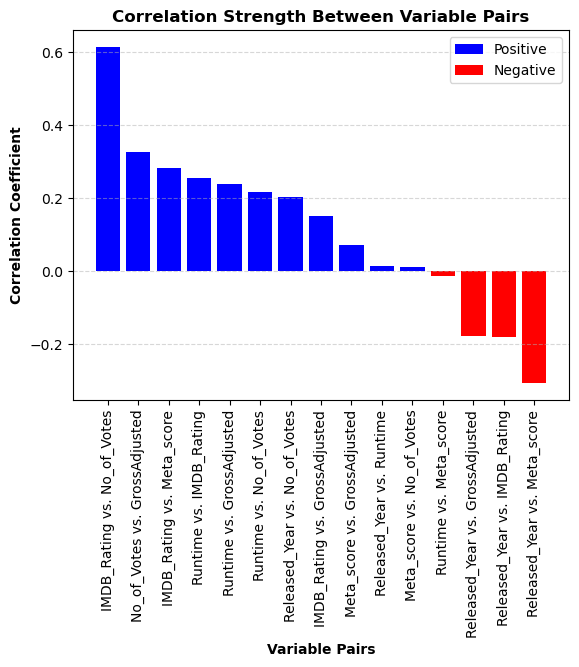

In [370]:
# Create correlation figure and axis objects
corr_fig, corr_ax = plt.subplots()
positive = corr_combined[corr_combined["Correlation"] >= 0]
negative = corr_combined[corr_combined["Correlation"] < 0]
corr_ax.bar(positive["Variables"], positive["Correlation"], color="blue", label="Positive")
corr_ax.bar(negative["Variables"], negative["Correlation"], color="red", label="Negative")

# Decorate correlation figure
corr_ax.set_title("Correlation Strength Between Variable Pairs", weight="bold")
corr_ax.set_xlabel("Variable Pairs", weight="bold")
corr_ax.set_xticks(corr_combined["Variables"])
corr_ax.set_xticklabels(corr_combined["Variables"], rotation=90)
corr_ax.set_ylabel("Correlation Coefficient", weight="bold")
corr_ax.grid(True, axis="y", linestyle="--", alpha=0.5)

plt.tight_layout
plt.legend()
plt.show()

corr_fig.savefig("img/correlation_graph.png", dpi=300, bbox_inches="tight")

In [371]:
# Top strongest correlations were:
# IMDB Rating vs. Number of Votes (strong-ish)
# Number of Votes vs. Gross Adjusted (meh)
# Released Year vs. Meta Score (meh)

### Ratings vs. Votes

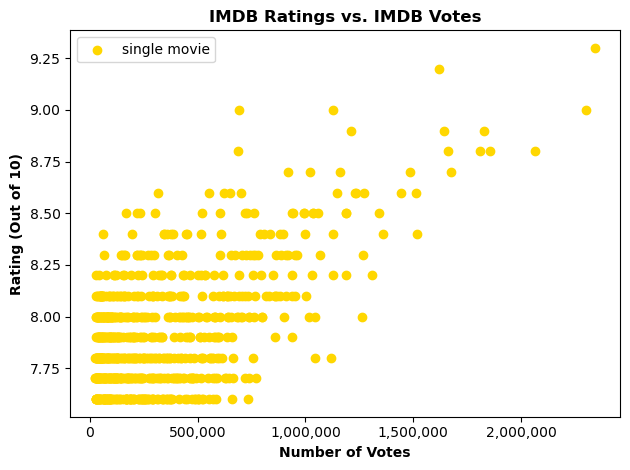

In [372]:
# Let's start with IMDB rating vs number of votes
rating_vs_votes_fig, rating_vs_votes_ax = plt.subplots()
rating_vs_votes_ax.scatter(numeric_df["No_of_Votes"], numeric_df["IMDB_Rating"], color="gold", label="single movie")
rating_vs_votes_ax.ticklabel_format(style="plain")
rating_vs_votes_ax.xaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))
rating_vs_votes_ax.set_title("IMDB Ratings vs. IMDB Votes", weight="bold")
rating_vs_votes_ax.set_xlabel("Number of Votes", weight="bold")
rating_vs_votes_ax.set_ylabel("Rating (Out of 10)", weight="bold")

plt.tight_layout()
plt.legend()
plt.show()

rating_vs_votes_fig.savefig("img/corr_ratings_vs_votes_graph.png", dpi=300, bbox_inches="tight")

In [373]:
# The most voted movies were much more likely to be
# the highly rated movie by the popular audience

### Votes vs. Gross

In [374]:
# Now for number of votes vs. gross adjusted
# But first. "Gone with the Wind" is extreme outlier for Gross, which will skew our graph
# So let's remove that single entry:
cleaned_df.sort_values(by="GrossAdjusted", ascending=False)

# Index 314. Let's temporarily remove that:
temp_df = cleaned_df.drop(index=314)

temp_df.info()
exists = "Gone with the Wind" in temp_df["Series_Title"].values
print(exists)

<class 'pandas.core.frame.DataFrame'>
Index: 749 entries, 0 to 997
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   749 non-null    object 
 1   Released_Year  749 non-null    int64  
 2   Runtime        749 non-null    int64  
 3   Genre          749 non-null    object 
 4   IMDB_Rating    749 non-null    float64
 5   Meta_score     749 non-null    float64
 6   Director       749 non-null    object 
 7   Star1          749 non-null    object 
 8   Star2          749 non-null    object 
 9   Star3          749 non-null    object 
 10  Star4          749 non-null    object 
 11  No_of_Votes    749 non-null    int64  
 12  GrossAdjusted  749 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 81.9+ KB
False


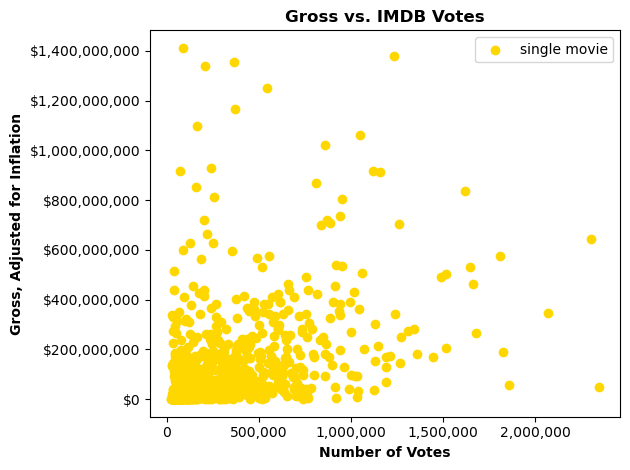

In [375]:
# Now to make our graph for real
gross_vs_votes_fig, gross_vs_votes_ax = plt.subplots()
gross_vs_votes_ax.scatter(temp_df["No_of_Votes"], temp_df["GrossAdjusted"], color="gold", label="single movie")

# Formatting for raw dollars
gross_vs_votes_ax.ticklabel_format(style="plain")
gross_vs_votes_ax.xaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))
gross_vs_votes_ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("${x:,.0f}"))

# Graph configuration
gross_vs_votes_ax.set_title("Gross vs. IMDB Votes", weight="bold")
gross_vs_votes_ax.set_xlabel("Number of Votes", weight="bold")
gross_vs_votes_ax.set_ylabel("Gross, Adjusted for Inflation", weight="bold")

plt.tight_layout()
plt.legend()
plt.show()

gross_vs_votes_fig.savefig("img/corr_gross_vs_votes_graph.png", dpi=300, bbox_inches="tight")

### Year vs. Score

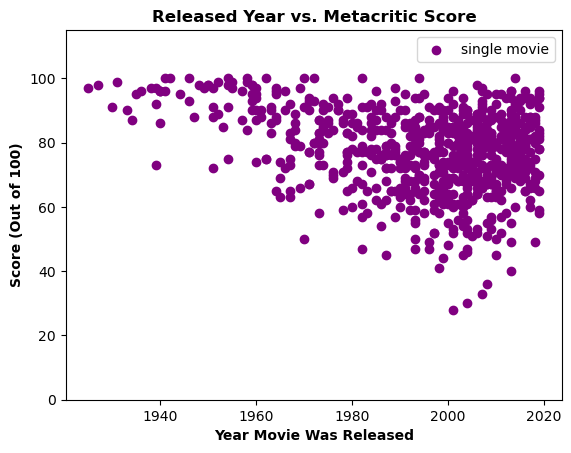

In [376]:
# And now for release year against meta critic score
year_vs_meta_fig, year_vs_meta_ax = plt.subplots()
year_vs_meta_ax.scatter(numeric_df["Released_Year"], numeric_df["Meta_score"], color="purple", label="single movie")
year_vs_meta_ax.ticklabel_format(style="plain")
year_vs_meta_ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))
year_vs_meta_ax.set_title("Released Year vs. Metacritic Score", weight="bold")
year_vs_meta_ax.set_xlabel("Year Movie Was Released", weight="bold")
year_vs_meta_ax.set_ylabel("Score (Out of 100)", weight="bold")
year_vs_meta_ax.set_ylim(0, 115)

plt.tight_layout
plt.legend()

year_vs_meta_fig.savefig("img/corr_year_vs_meta_graph.png", dpi=300, bbox_inches="tight")

In [377]:
# Seems like an audience of critics hold older Top 1000 movies in higher regard,
# and are a lot more willing to give lower scores to recent movies

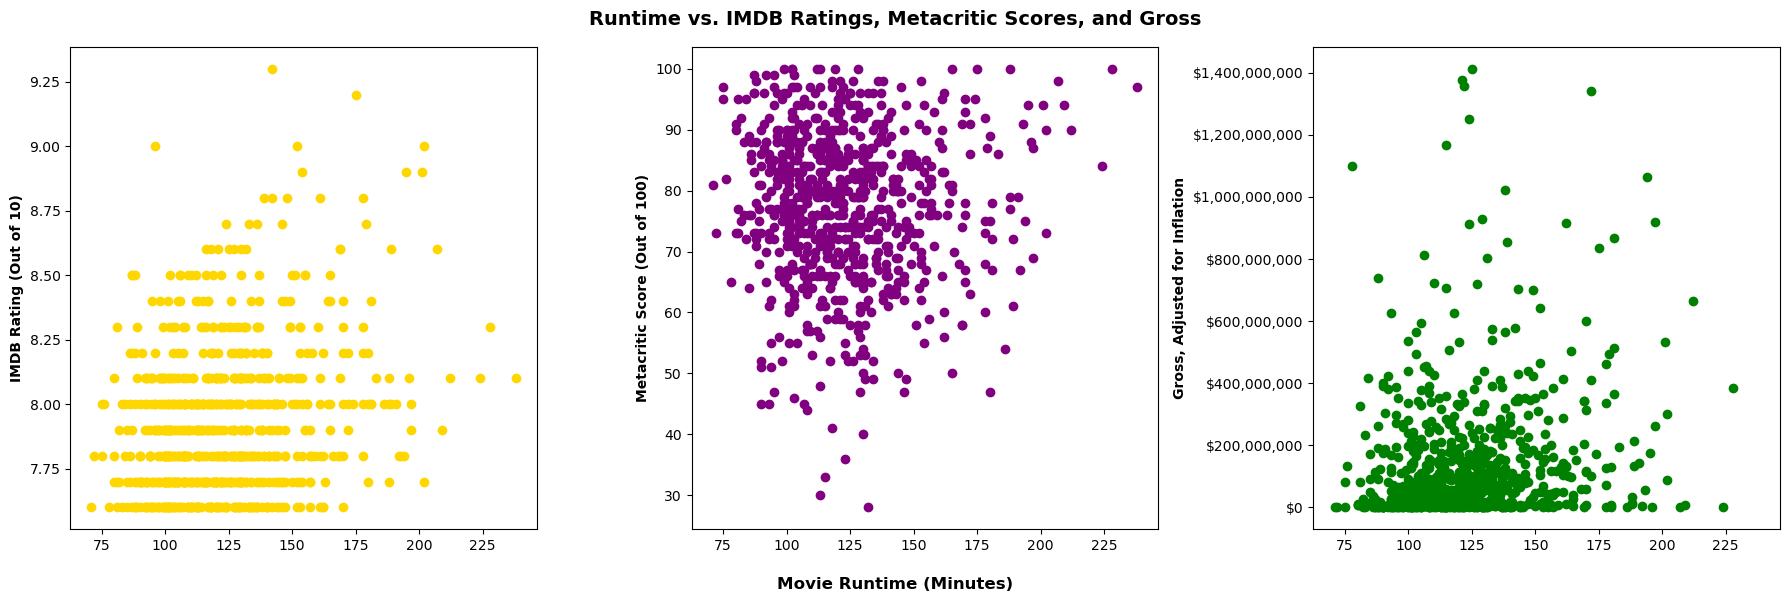

In [378]:
# Numeric relations to explore:
# Runtime vs IMDB Ratings, Meta Score, and Gross

# Runtime vs IMDB ratings
runtime_fig, (runtime_imdb, runtime_meta, runtime_gross) = plt.subplots(1, 3, figsize=(18, 6), sharex=True)
runtime_imdb.scatter(numeric_df["Runtime"], numeric_df["IMDB_Rating"], color="gold")
runtime_imdb.set_ylabel("IMDB Rating (Out of 10)", weight="bold")

# Runtime vs Metacritic scores
runtime_meta.scatter(numeric_df["Runtime"], numeric_df["Meta_score"], color="purple")
runtime_meta.set_ylabel("Metacritic Score (Out of 100)", weight="bold")

# Runtime vs Gross
runtime_gross.scatter(temp_df["Runtime"], temp_df["GrossAdjusted"], color="green")
runtime_gross.ticklabel_format(style="plain")
runtime_gross.xaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))
runtime_gross.yaxis.set_major_formatter(mticker.StrMethodFormatter("${x:,.0f}"))
runtime_gross.set_ylabel("Gross, Adjusted for Inflation", weight="bold")

# Overall figure configuration
runtime_fig.suptitle("Runtime vs. IMDB Ratings, Metacritic Scores, and Gross", weight="bold", fontsize=14)
runtime_fig.supxlabel("Movie Runtime (Minutes)", weight="bold")

plt.tight_layout()
plt.show()

runtime_fig.savefig("img/corr_runtime_graph.png", dpi=300, bbox_inches="tight")

# Non-Numeric Relationships

In [379]:
# Remaining non-numeric relationships to explore:
# Genre vs IMDB Ratings, Meta Score, and Gross
# Director vs IMDB Ratings, Meta Score, and Gross
# Actors/Actresses vs IMDB Ratings, Meta Score, and Gross

## Genre vs. Ratings, Meta Score, and Gross

In [380]:
# Genre vs IMDB Ratings, Meta Score, and Gross. We need to consolidate via genre first.
# There are multiple words in each genre. For simplicity's sake I will duplicate each movie per genre

# Split Genre rows
genre_df = cleaned_df.copy()
genre_df["Genre"] = cleaned_df["Genre"].str.split(", ")
genre_df = genre_df.explode("Genre", ignore_index=True)
genre_df = genre_df[["Genre", "IMDB_Rating", "Meta_score", "GrossAdjusted"]]
genre_df

# Time to aggregate
genre_df = (
	genre_df
	.groupby("Genre")
	.agg(
		MovieCount=("Genre", "count"),
		IMDB_Rating=("IMDB_Rating", "mean"),
		Meta_score=("Meta_score", "mean"),
		GrossAdjusted=("GrossAdjusted", "mean")
	)
	.reset_index()
)
genre_df

,Genre,MovieCount,IMDB_Rating,Meta_score,GrossAdjusted
0,Action,143,7.93,73.72,223990437.76
1,Adventure,165,7.96,77.87,263932760.70
2,Animation,64,7.92,81.83,209850280.79
3,Biography,88,7.91,76.43,123324120.08
4,Comedy,166,7.87,77.58,134373068.95
5,Crime,151,7.94,74.95,92984334.38
6,Drama,531,7.94,77.54,107297007.46
7,Family,45,7.87,77.56,270925095.83
8,Fantasy,55,7.90,76.00,226819359.84
9,Film-Noir,8,8.04,93.25,50850148.52


### Genre vs. Ratings

In [381]:
# Data frames for each variables
# First, IMDB ratings
genre_imdb_df = (genre_df[["Genre", "MovieCount", "IMDB_Rating"]]
	.sort_values(
        by=["MovieCount", "IMDB_Rating"],
        ascending=[False, False]
    )
)
genre_imdb_df = genre_imdb_df.head(10).sort_values("IMDB_Rating", ascending=False)
dfi.export(genre_imdb_df, "img/genre_imdb_table.png", table_conversion="chrome")
genre_imdb_df

,Genre,MovieCount,IMDB_Rating
1,Adventure,165,7.96
14,Mystery,73,7.95
5,Crime,151,7.94
6,Drama,531,7.94
0,Action,143,7.93
15,Romance,91,7.92
2,Animation,64,7.92
18,Thriller,104,7.91
3,Biography,88,7.91
4,Comedy,166,7.87


Genre vs. Scores

Genre vs. Gross

## Director vs. Ratings, Scores, and Gross

In [382]:
# Make aggregated data frame for directors vs. IMDB ratings, meta Score, and gross
director_df = (
	cleaned_df
	.groupby("Director")
	.agg(
		MovieCount=("Director", "count"),
		IMDB_Rating=("IMDB_Rating", "mean"),
		Meta_score=("Meta_score", "mean"),
		GrossAdjusted=("GrossAdjusted", "mean")
	)
	.reset_index()
)
director_df

,Director,MovieCount,IMDB_Rating,Meta_score,GrossAdjusted
0,Abdellatif Kechiche,1,7.70,89.00,2443244.16
1,Abhishek Kapoor,1,7.70,40.00,1246823.98
2,Adam McKay,1,7.80,81.00,76722592.22
3,Akira Kurosawa,3,8.33,97.33,4524305.10
4,Alan J. Pakula,1,7.90,84.00,321112126.54
...,...,...,...,...,...
421,Yoshiaki Kawajiri,1,7.70,62.00,227067.69
422,Yôjirô Takita,1,8.10,68.00,1800913.83
423,Zack Snyder,2,7.60,54.00,200043101.77
424,Zaza Urushadze,1,8.20,73.00,160501.54


### Director vs. Ratings

In [383]:
# Data frames for each variables
# First, IMDB ratings
director_imdb_df = (director_df[["Director", "MovieCount", "IMDB_Rating"]]
	.sort_values(
        by=["MovieCount", "IMDB_Rating"],
        ascending=[False, False]
    )
)
director_imdb_df = director_imdb_df.head(10).sort_values("IMDB_Rating", ascending=False)
dfi.export(director_imdb_df, "img/director_imdb_table.png", table_conversion="chrome")
director_imdb_df

,Director,MovieCount,IMDB_Rating
61,Christopher Nolan,8,8.46
310,Quentin Tarantino,8,8.18
250,Martin Scorsese,10,8.17
14,Alfred Hitchcock,9,8.14
143,Hayao Miyazaki,7,8.14
74,David Fincher,8,8.04
371,Steven Spielberg,13,8.03
62,Clint Eastwood,8,7.91
325,Rob Reiner,7,7.83
416,Woody Allen,7,7.81


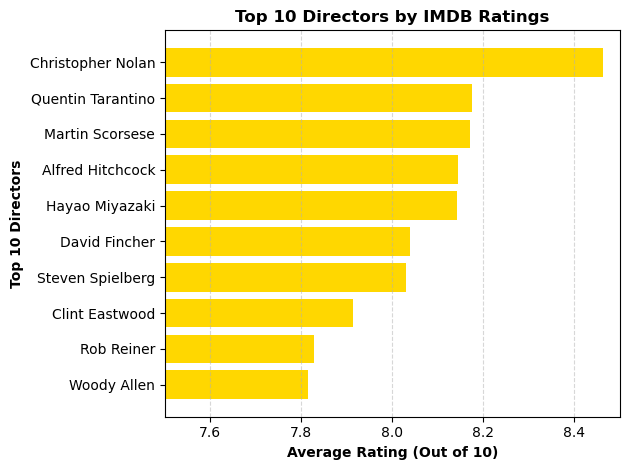

In [384]:
# Time to make horizontal bar graph
director_imdb_fig, director_imdb_ax = plt.subplots()
director_imdb_ax.barh(director_imdb_df["Director"], director_imdb_df["IMDB_Rating"], color="gold")
director_imdb_ax.invert_yaxis()
director_imdb_ax.set_title("Top 10 Directors by IMDB Ratings", weight="bold")
director_imdb_ax.set_xlabel("Average Rating (Out of 10)", weight="bold")
director_imdb_ax.grid(True, axis="x", linestyle="--", alpha=0.5)
director_imdb_ax.set_ylabel("Top 10 Directors", weight="bold")
director_imdb_ax.set_xlim(7.5, 8.5)

plt.tight_layout()
plt.show()

director_imdb_fig.savefig("img/director_imdb_graph.png", dpi=300, bbox_inches="tight")

### Director vs. Scores

In [385]:
# Second, Metacritic scores
director_meta_df = (director_df[["Director", "MovieCount", "Meta_score"]]
	.sort_values(
        by=["MovieCount", "Meta_score"],
        ascending=[False, False]
    )
)
director_meta_df = director_meta_df.head(10).sort_values("Meta_score", ascending=False)
dfi.export(director_meta_df, "img/director_meta_table.png", table_conversion="chrome")
director_meta_df

,Director,MovieCount,Meta_score
14,Alfred Hitchcock,9,92.67
143,Hayao Miyazaki,7,84.71
250,Martin Scorsese,10,82.60
416,Woody Allen,7,81.43
371,Steven Spielberg,13,80.54
310,Quentin Tarantino,8,78.25
61,Christopher Nolan,8,77.50
62,Clint Eastwood,8,77.12
74,David Fincher,8,73.12
325,Rob Reiner,7,71.71


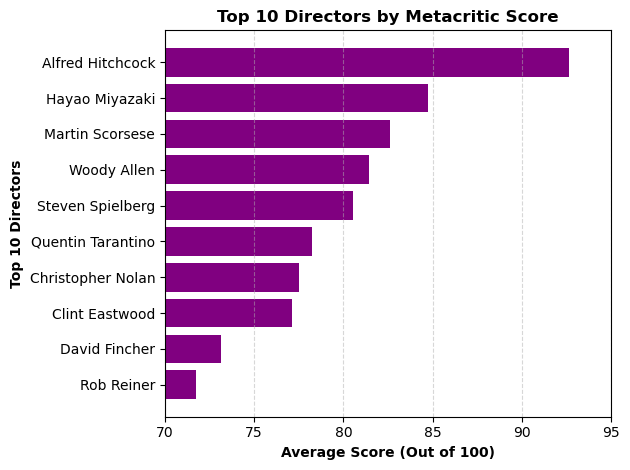

In [386]:
# Time to make horizontal bar graph
director_meta_fig, director_meta_ax = plt.subplots()
director_meta_ax.barh(director_meta_df["Director"], director_meta_df["Meta_score"], color="purple")
director_meta_ax.invert_yaxis()
director_meta_ax.set_title("Top 10 Directors by Metacritic Score", weight="bold")
director_meta_ax.set_xlabel("Average Score (Out of 100)", weight="bold")
director_meta_ax.grid(True, axis="x", linestyle="--", alpha=0.5)
director_meta_ax.set_ylabel("Top 10 Directors", weight="bold")
director_meta_ax.set_xlim(70, 95)

plt.tight_layout()
plt.show()

director_meta_fig.savefig("img/director_meta_graph.png", dpi=300, bbox_inches="tight")

### Director vs. Gross

In [387]:
# Third, Gross adjusted
director_gross_df = (director_df[["Director", "MovieCount", "GrossAdjusted"]]
    .sort_values(
        by=["MovieCount", "GrossAdjusted"],
        ascending=[False, False]
    )
)
director_gross_df = director_gross_df.head(10).sort_values("GrossAdjusted", ascending=False)
dfi.export(director_gross_df, "img/director_gross_table.png", table_conversion="chrome")
director_gross_df

,Director,MovieCount,GrossAdjusted
371,Steven Spielberg,13,471629900.78
61,Christopher Nolan,8,285045047.06
14,Alfred Hitchcock,9,130243492.66
62,Clint Eastwood,8,119471592.80
74,David Fincher,8,114562446.63
310,Quentin Tarantino,8,114409279.56
325,Rob Reiner,7,110300142.70
250,Martin Scorsese,10,85777675.68
416,Woody Allen,7,83516604.36
143,Hayao Miyazaki,7,7508364.49


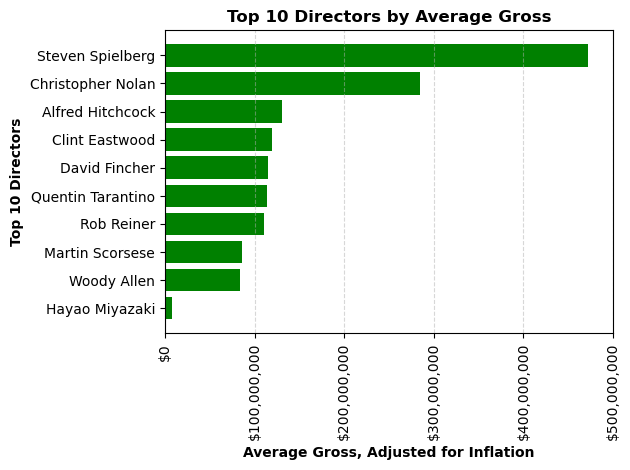

In [388]:
# Time to make horizontal bar graph
director_gross_fig, director_gross_ax = plt.subplots()
director_gross_ax.barh(director_gross_df["Director"], director_gross_df["GrossAdjusted"], color="green")
director_gross_ax.invert_yaxis()
director_gross_ax.set_title("Top 10 Directors by Average Gross", weight="bold")
director_gross_ax.set_xlabel("Average Gross, Adjusted for Inflation", weight="bold")
director_gross_ax.grid(True, axis="x", linestyle="--", alpha=0.5)
director_gross_ax.xaxis.set_major_formatter(mticker.StrMethodFormatter("${x:,.0f}"))
director_gross_ax.set_ylabel("Top 10 Directors", weight="bold")
director_gross_ax.set_xlim(0, 500000000)

plt.setp(director_gross_ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

director_gross_fig.savefig("img/director_gross_graph.png", dpi=300, bbox_inches="tight")